Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from joblib import dump, load

In [143]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score,
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


Loading Data

In [145]:
# Creating dataframe to store the data
df=pd.read_csv(r'/content/drive/MyDrive/csi project/archive/train.csv')
df.head()

<ipython-input-145-862c43eee84e>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r'/content/drive/MyDrive/csi project/archive/train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [146]:
len(df)

100000

In [147]:
df.drop('Name', axis=1, inplace=True)

Data Preprocessing

In [148]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [149]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       100000 non-null  object
 1   Customer_ID              100000 non-null  object
 2   Month                    100000 non-null  object
 3   Age                      100000 non-null  object
 4   SSN                      100000 non-null  object
 5   Occupation               100000 non-null  object
 6   Annual_Income            100000 non-null  object
 7   Num_of_Loan              100000 non-null  object
 8   Type_of_Loan             88592 non-null   object
 9   Num_of_Delayed_Payment   92998 non-null   object
 10  Changed_Credit_Limit     100000 non-null  object
 11  Credit_Mix               100000 non-null  object
 12  Outstanding_Debt         100000 non-null  object
 13  Credit_History_Age       90970 non-null   object
 14  Payment_of_Min_Amount

In [150]:
def text_cleaning(data):
    if data is np.NaN or not isinstance(data, str):
        return data
    else:
        return str(data).strip('_ ,"')

In [151]:
df = df.applymap(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
df.head()

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,4.0,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,-500,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,NaN,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,23,821-00-0265,Scientist,19114.12,NaN,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [152]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Age                             0
SSN                          5572
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [153]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       100000 non-null  object
 1   Customer_ID              100000 non-null  object
 2   Month                    100000 non-null  object
 3   Age                      100000 non-null  object
 4   SSN                      94428 non-null   object
 5   Occupation               92938 non-null   object
 6   Annual_Income            100000 non-null  object
 7   Num_of_Loan              100000 non-null  object
 8   Type_of_Loan             88592 non-null   object
 9   Num_of_Delayed_Payment   92998 non-null   object
 10  Changed_Credit_Limit     97909 non-null   object
 11  Credit_Mix               79805 non-null   object
 12  Outstanding_Debt         100000 non-null  object
 13  Credit_History_Age       90970 non-null   object
 14  Payment_of_Min_Amount

In [154]:
df['ID']                      = df.ID.apply(lambda x: int(x, 16))
df['Customer_ID']             = df.Customer_ID.apply(lambda x: int(x[4:], 16))
df['Month']                   = pd.to_datetime(df.Month, format='%B').dt.month
df['Age']                     = df.Age.astype(int)
df['SSN']                     = df.SSN.apply(lambda x: x if x is np.NaN else int(str(x).replace('-', ''))).astype(float)
df['Annual_Income']           = df.Annual_Income.astype(float)
df['Num_of_Loan']             = df.Num_of_Loan.astype(int)
df['Num_of_Delayed_Payment']  = df.Num_of_Delayed_Payment.astype(float)
df['Changed_Credit_Limit']    = df.Changed_Credit_Limit.astype(float)
df['Outstanding_Debt']        = df.Outstanding_Debt.astype(float)
df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)
df['Monthly_Balance']         = df.Monthly_Balance.astype(float)

In [155]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Occupation             92938 non-null   object
 1   Type_of_Loan           88592 non-null   object
 2   Credit_Mix             79805 non-null   object
 3   Credit_History_Age     90970 non-null   object
 4   Payment_of_Min_Amount  100000 non-null  object
 5   Payment_Behaviour      92400 non-null   object
 6   Credit_Score           100000 non-null  object
dtypes: object(7)
memory usage: 5.3+ MB


In [156]:
def Month_Converter(x):
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])

        return (num1*12)+num2
    else:
        return x

In [157]:
df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(float)

In [158]:
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: x.lower().replace('and ', '').replace(', ', '').strip() if pd.notna(x) else x)

In [159]:
# To display all columns in the console
pd.set_option('display.max_columns', None)

# Print the first 10 rows with all columns
print(df.head(30))

      ID  Customer_ID  Month  Age          SSN    Occupation  Annual_Income  \
0   5634         3392      1   23  821000265.0     Scientist       19114.12   
1   5635         3392      2   23  821000265.0     Scientist       19114.12   
2   5636         3392      3 -500  821000265.0     Scientist       19114.12   
3   5637         3392      4   23  821000265.0     Scientist       19114.12   
4   5638         3392      5   23  821000265.0     Scientist       19114.12   
5   5639         3392      6   23  821000265.0     Scientist       19114.12   
6   5640         3392      7   23  821000265.0     Scientist       19114.12   
7   5641         3392      8   23          NaN     Scientist       19114.12   
8   5646         8625      1   28    4075839.0           NaN       34847.84   
9   5647         8625      2   28    4075839.0       Teacher       34847.84   
10  5648         8625      3   28    4075839.0       Teacher       34847.84   
11  5649         8625      4   28    4075839.0      

In [160]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Age                             0
SSN                          5572
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [161]:
df['Type_of_Loan'].value_counts(dropna=False).head(20)

NaN                                   11408
not specified                          1408
credit-builder loan                    1280
personal loan                          1272
debt consolidation loan                1264
student loan                           1240
payday loan                            1200
mortgage loan                          1176
auto loan                              1152
home equity loan                       1136
personal loanstudent loan               320
not specifiedpayday loan                272
mortgage loanhome equity loan           264
student loanpayday loan                 256
student loancredit-builder loan         248
credit-builder loannot specified        248
payday loandebt consolidation loan      240
payday loanauto loan                    240
mortgage loannot specified              232
payday loanpersonal loan                232
Name: Type_of_Loan, dtype: int64

In [162]:
df['Type_of_Loan'].fillna('not specified', inplace=True)

# Group by "Customer_ID" and get the most common loan type
loan_types = df.groupby('Customer_ID')['Type_of_Loan'].agg(lambda x: x.value_counts().index[0]).reset_index()

# Merge the loan types back to the original dataframe
df = pd.merge(df, loan_types, on='Customer_ID', how='left')

In [163]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Age                             0
SSN                          5572
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan_x                  0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
Type_of_Loan_y                  0
dtype: int64

In [164]:
df['Type_of_Loan_y'].value_counts(dropna=False).head(20)

not specified                         12816
credit-builder loan                    1280
personal loan                          1272
debt consolidation loan                1264
student loan                           1240
payday loan                            1200
mortgage loan                          1176
auto loan                              1152
home equity loan                       1136
personal loanstudent loan               320
not specifiedpayday loan                272
mortgage loanhome equity loan           264
student loanpayday loan                 256
credit-builder loannot specified        248
student loancredit-builder loan         248
payday loanauto loan                    240
payday loandebt consolidation loan      240
payday loanstudent loan                 232
personal loancredit-builder loan        232
mortgage loannot specified              232
Name: Type_of_Loan_y, dtype: int64

In [165]:
df.drop('Type_of_Loan_x', axis=1, inplace=True)

In [166]:
df.head()

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Type_of_Loan_y
0,5634,3392,1,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,NaN,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good,auto loancredit-builder loanpersonal loanhome ...
1,5635,3392,2,23,821000265.0,Scientist,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good,auto loancredit-builder loanpersonal loanhome ...
2,5636,3392,3,-500,821000265.0,Scientist,19114.12,NaN,3,4,3,4,3,7.0,NaN,4.0,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good,auto loancredit-builder loanpersonal loanhome ...
3,5637,3392,4,23,821000265.0,Scientist,19114.12,NaN,3,4,3,4,5,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good,auto loancredit-builder loanpersonal loanhome ...
4,5638,3392,5,23,821000265.0,Scientist,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good,auto loancredit-builder loanpersonal loanhome ...


In [167]:

# Define the columns you want to fill null values in
columns_to_fill = ['SSN', 'Occupation', 'Monthly_Inhand_Salary','Num_Credit_Inquiries','Credit_Mix','Payment_Behaviour']

# Group the DataFrame by the desired column(s) - 'group' in this example
grouped = df.groupby("Customer_ID")

# Define a custom function to fill null values with mode within each group
def fill_null_with_mode(group):
    return group[columns_to_fill].fillna(group[columns_to_fill].mode().iloc[0])

# Apply the custom function to the grouped DataFrame and reset the index
df[columns_to_fill] = grouped.apply(fill_null_with_mode).reset_index(drop=True)[columns_to_fill]



<ipython-input-167-fa1ff6eeb49d>:12: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[columns_to_fill] = grouped.apply(fill_null_with_mode).reset_index(drop=True)[columns_to_fill]


In [168]:
df.isna().sum()

ID                             0
Customer_ID                    0
Month                          0
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment      7002
Changed_Credit_Limit        2091
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          9030
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4479
Payment_Behaviour              0
Monthly_Balance             1200
Credit_Score                   0
Type_of_Loan_y                 0
dtype: int64

In [169]:
df['Age'] = df['Age'].apply(lambda x: np.nan if x < 0 else x)

In [170]:
columns_to_fill = ['Monthly_Balance', 'Amount_invested_monthly', 'Credit_History_Age', 'Changed_Credit_Limit', 'Num_of_Delayed_Payment','Age']

# Group the DataFrame by the desired column(s) - 'group' in this example
grouped = df.groupby("Customer_ID")

# Define a custom function to fill null values with median within each group
def fill_null_with_median(group):
    return group[columns_to_fill].fillna(group[columns_to_fill].median())

# Apply the custom function to the grouped DataFrame and reset the index
df[columns_to_fill] = grouped.apply(fill_null_with_median).reset_index(drop=True)[columns_to_fill]

<ipython-input-170-002c5a0f95ba>:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[columns_to_fill] = grouped.apply(fill_null_with_median).reset_index(drop=True)[columns_to_fill]


In [171]:
df.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Type_of_Loan_y              0
dtype: int64

In [172]:
len(df)

100000

In [173]:
# To display all columns in the console
pd.set_option('display.max_columns', None)

# Print the first 10 rows with all columns
print(df.head(30))

      ID  Customer_ID  Month   Age          SSN    Occupation  Annual_Income  \
0   5634         3392      1  23.0  821000265.0     Scientist       19114.12   
1   5635         3392      2  23.0  821000265.0     Scientist       19114.12   
2   5636         3392      3  23.0  821000265.0     Scientist       19114.12   
3   5637         3392      4  23.0  821000265.0     Scientist       19114.12   
4   5638         3392      5  23.0  821000265.0     Scientist       19114.12   
5   5639         3392      6  23.0  821000265.0     Scientist       19114.12   
6   5640         3392      7  23.0  821000265.0     Scientist       19114.12   
7   5641         3392      8  23.0  821000265.0     Scientist       19114.12   
8   5646         8625      1  28.0    4075839.0       Teacher       34847.84   
9   5647         8625      2  28.0    4075839.0       Teacher       34847.84   
10  5648         8625      3  28.0    4075839.0       Teacher       34847.84   
11  5649         8625      4  28.0    40

In [174]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Occupation             100000 non-null  object
 1   Credit_Mix             100000 non-null  object
 2   Payment_of_Min_Amount  100000 non-null  object
 3   Payment_Behaviour      100000 non-null  object
 4   Credit_Score           100000 non-null  object
 5   Type_of_Loan_y         100000 non-null  object
dtypes: object(6)
memory usage: 5.3+ MB


In [175]:
label_encode_cols = ['Occupation', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score', 'Type_of_Loan_y']

# Create a dictionary to store the encoder objects
encoders = {}

# Iterate over each column and apply label encoding
for column in label_encode_cols:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    encoders[column] = encoder

# Save the encoder objects separately
dump(encoders, '/content/drive/MyDrive/csi project/encoders.joblib')

['/content/drive/MyDrive/csi project/encoders.joblib']

In [177]:
df.head()

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Type_of_Loan_y
0,5634,3392,1,23.0,821000265.0,12,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,1,809.98,26.822620,265.0,1,49.574949,80.415295,2,312.494089,0,135
1,5635,3392,2,23.0,821000265.0,12,19114.12,1824.843333,3,4,3,4,-1,6.5,11.27,4.0,1,809.98,31.944960,268.5,1,49.574949,118.280222,3,284.629162,0,135
2,5636,3392,3,23.0,821000265.0,12,19114.12,1824.843333,3,4,3,4,3,7.0,11.27,4.0,1,809.98,28.609352,267.0,1,49.574949,81.699521,4,331.209863,0,135
3,5637,3392,4,23.0,821000265.0,12,19114.12,1824.843333,3,4,3,4,5,4.0,6.27,4.0,1,809.98,31.377862,268.0,1,49.574949,199.458074,5,223.451310,0,135
4,5638,3392,5,23.0,821000265.0,12,19114.12,1824.843333,3,4,3,4,6,6.5,11.27,4.0,1,809.98,24.797347,269.0,1,49.574949,41.420153,1,341.489231,0,135


In [178]:
# df.to_csv('no_null_train.csv',index=False)

In [179]:
# df=pd.read_csv(r'/content/drive/MyDrive/csi project/no_null_train.csv')

In [180]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Column: {column}')
    print(unique_values)
    print(len(unique_values))
    print('----------------------')

Column: ID
[  5634   5635   5636 ... 155627 155628 155629]
100000
----------------------
Column: Customer_ID
[ 3392  8625 11708 ... 44897 34304 37932]
12500
----------------------
Column: Month
[1 2 3 4 5 6 7 8]
8
----------------------
Column: Age
[  23.   28.   34. ... 4808. 2263. 1342.]
1729
----------------------
Column: SSN
[8.21000265e+08 4.07583900e+06 4.86853974e+08 ... 1.33167738e+08
 3.13509420e+07 7.87359900e+07]
12500
----------------------
Column: Occupation
[12 13  4  5  2  7 10  3  6  8  0 11  9 14  1]
15
----------------------
Column: Annual_Income
[ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99]
13487
----------------------
Column: Monthly_Inhand_Salary
[ 1824.84333333  3037.98666667 12187.22       ...  3097.00833333
  1929.90666667  3359.41583333]
13235
----------------------
Column: Num_Bank_Accounts
[   3    2    1    7    4    0    8    5    6    9   10 1414 1231   67
  572 1488   91  528 1647 1696 1338  649  889 1668  685  857  975 1496
 1534 1620

In [181]:
columns = ['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Num_of_Delayed_Payment',
           'Num_Credit_Inquiries']

for column in columns:
    value_counts = df[column].value_counts()  # Count the occurrences of each unique value
    values_to_replace = value_counts[value_counts < 10].index  # Get the values with less than 10 occurrences
    df[column] = np.where(df[column].isin(values_to_replace), np.NaN, df[column])  # Replace the values with np.NaN


In [182]:
# Group the DataFrame by the desired column(s) - 'group' in this example
grouped = df.groupby("Customer_ID")

# Define a custom function to fill null values with median within each group
def fill_null_with_median(group):
    return group[columns].fillna(group[columns].median())

df[columns] = grouped.apply(fill_null_with_median).reset_index(drop=True)[columns]

<ipython-input-182-4c65c7759cd6>:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df[columns] = grouped.apply(fill_null_with_median).reset_index(drop=True)[columns]


In [183]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Column: {column}')
    print(unique_values)
    print(len(unique_values))
    print('----------------------')

Column: ID
[  5634   5635   5636 ... 155627 155628 155629]
100000
----------------------
Column: Customer_ID
[ 3392  8625 11708 ... 44897 34304 37932]
12500
----------------------
Column: Month
[1 2 3 4 5 6 7 8]
8
----------------------
Column: Age
[23.  28.  34.  54.  55.  21.  31.  33.  30.  24.  44.  45.  40.  41.
 32.  35.  36.  39.  37.  20.  46.  26.  42.  19.  48.  38.  43.  22.
 16.  18.  15.  27.  25.  14.  17.  47.  53.  56.  29.  49.  51.  50.
 52.  25.5 48.5 23.5 34.5 40.5 26.5 15.5 50.5 28.5 16.5 20.5 33.5 30.5]
56
----------------------
Column: SSN
[8.21000265e+08 4.07583900e+06 4.86853974e+08 ... 1.33167738e+08
 3.13509420e+07 7.87359900e+07]
12500
----------------------
Column: Occupation
[12 13  4  5  2  7 10  3  6  8  0 11  9 14  1]
15
----------------------
Column: Annual_Income
[ 19114.12  34847.84 143162.64 ...  37188.1   20002.88  39628.99]
13487
----------------------
Column: Monthly_Inhand_Salary
[ 1824.84333333  3037.98666667 12187.22       ...  3097.00833333
 

In [184]:
# for column in df.columns:
#     unique_values = df[column].unique()
#     value_counts = df[column].value_counts()

#     # Plot the histogram
#     plt.figure()
#     plt.bar(unique_values, value_counts)
#     plt.xlabel(column)
#     plt.ylabel('Count')
#     plt.title(f'Histogram of {column}')
#     plt.show()

In [185]:
df = df.abs()

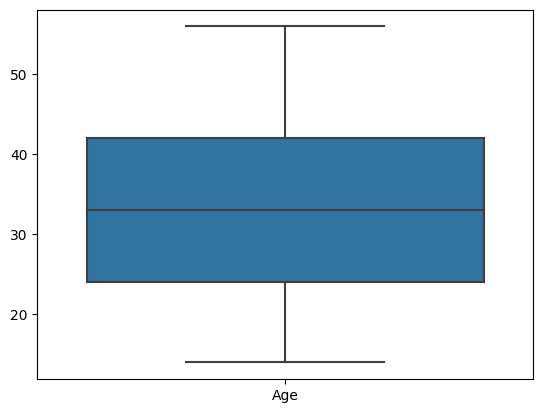

In [186]:
sns.boxplot(data=df[['Age']])
plt.show()

In [187]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Type_of_Loan_y'],
      dtype='object')

In [188]:
# Create a feature for monthly savings
df['Monthly_Savings'] = df['Monthly_Inhand_Salary'] - df['Annual_Income'] / 12

# Create a feature for the total number of financial accounts
df['Total_Accounts'] = df['Num_Bank_Accounts'] + df['Num_Credit_Card']

# Create a feature for the average monthly income
df['Avg_Monthly_Income'] = df['Annual_Income'] / 12

# Create a feature for the average monthly spending
df['Avg_Monthly_Spending'] = df['Avg_Monthly_Income'] - df['Monthly_Inhand_Salary']

# Create a feature for the income-to-age ratio
df['Income_to_Age_Ratio'] = df['Annual_Income'] / df['Age']

# Create a feature for the monthly savings-to-income ratio
df['Savings_to_Income_Ratio'] = df['Monthly_Savings'] / df['Annual_Income']

In [189]:
df.head()

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Type_of_Loan_y,Monthly_Savings,Total_Accounts,Avg_Monthly_Income,Avg_Monthly_Spending,Income_to_Age_Ratio,Savings_to_Income_Ratio
0,5634,3392,1,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,11.27,4.0,1,809.98,26.822620,265.0,1,49.574949,80.415295,2,312.494089,0,135,232.0,7.0,1592.843333,-232.0,831.048696,0.012138
1,5635,3392,2,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,1,6.5,11.27,4.0,1,809.98,31.944960,268.5,1,49.574949,118.280222,3,284.629162,0,135,232.0,7.0,1592.843333,-232.0,831.048696,0.012138
2,5636,3392,3,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,11.27,4.0,1,809.98,28.609352,267.0,1,49.574949,81.699521,4,331.209863,0,135,232.0,7.0,1592.843333,-232.0,831.048696,0.012138
3,5637,3392,4,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,5,4.0,6.27,4.0,1,809.98,31.377862,268.0,1,49.574949,199.458074,5,223.451310,0,135,232.0,7.0,1592.843333,-232.0,831.048696,0.012138
4,5638,3392,5,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,6,6.5,11.27,4.0,1,809.98,24.797347,269.0,1,49.574949,41.420153,1,341.489231,0,135,232.0,7.0,1592.843333,-232.0,831.048696,0.012138


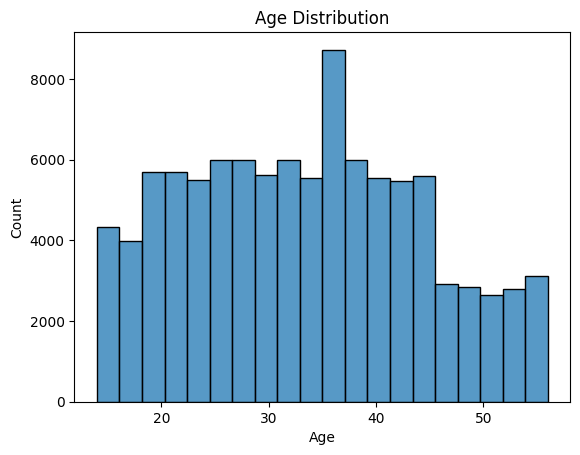

In [190]:
# Age distribution
sns.histplot(data=df, x='Age', bins=20)
plt.title('Age Distribution')
plt.show()



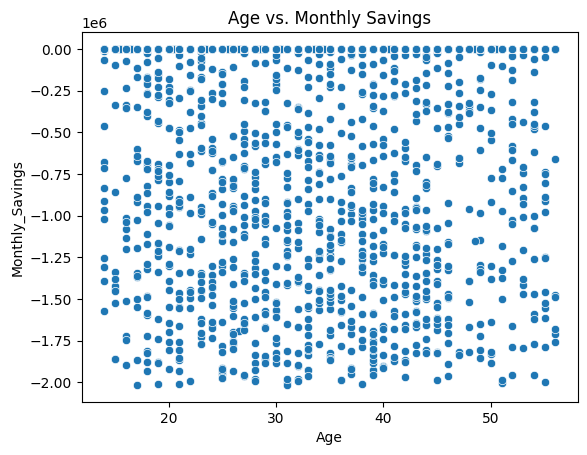

In [191]:
# Scatter plot of age vs. monthly savings
sns.scatterplot(data=df, x='Age', y='Monthly_Savings')
plt.title('Age vs. Monthly Savings')
plt.show()



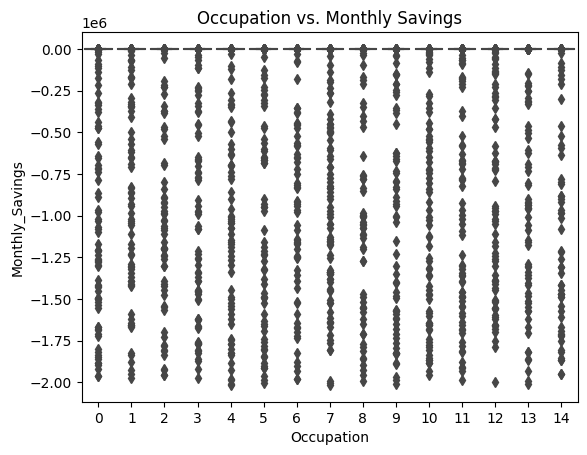

In [192]:
# Box plot of occupation vs. monthly savings
sns.boxplot(data=df, x='Occupation', y='Monthly_Savings')
plt.title('Occupation vs. Monthly Savings')
plt.show()



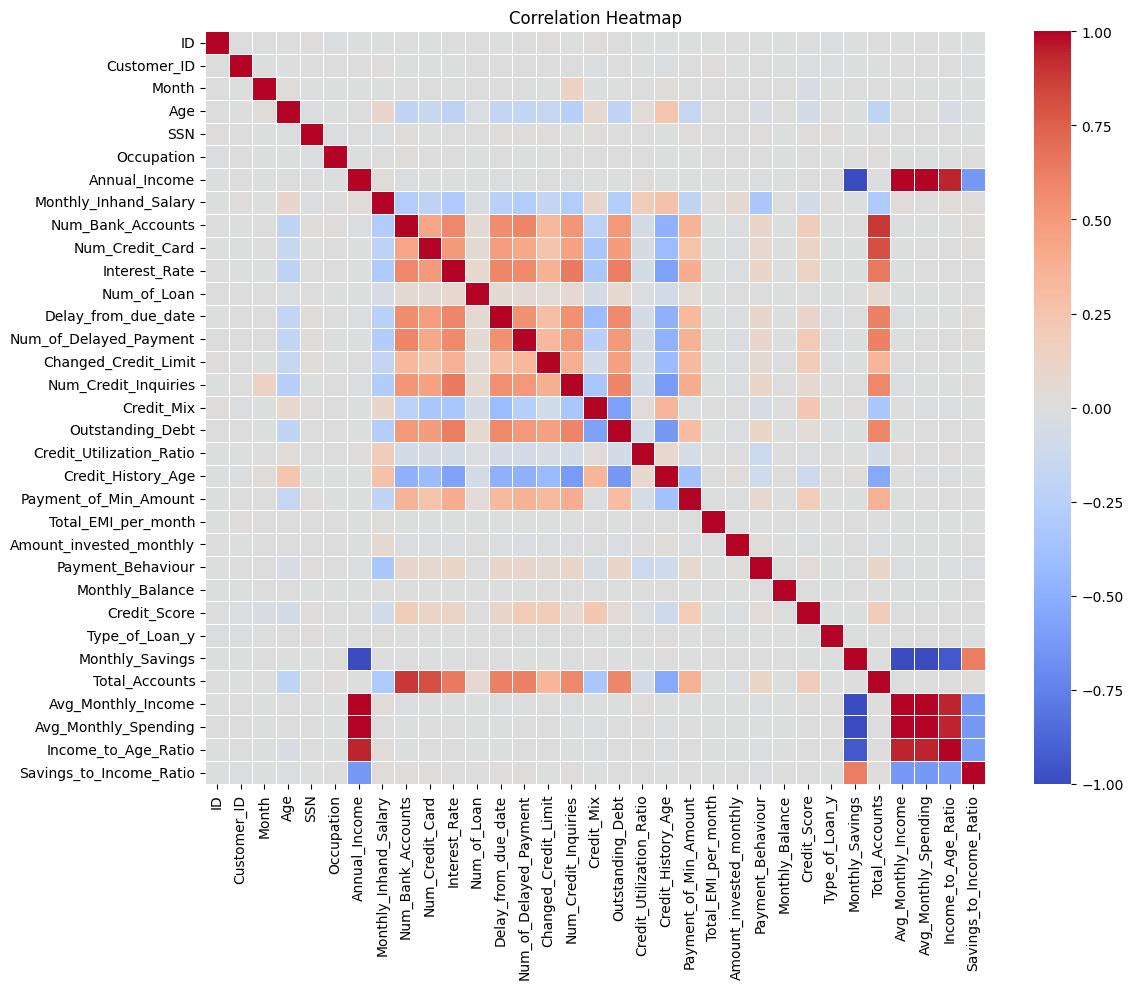

In [193]:
# Increase the figure size
plt.figure(figsize=(12, 10))

# Correlation heatmap
corr_matrix = df.corr()

# Customize the heatmap
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=90)

# Add a title
plt.title('Correlation Heatmap')

# Adjust the layout to prevent overlapping of the heatmap
plt.tight_layout()

# Display the heatmap
plt.show()

In [194]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Type_of_Loan_y,Monthly_Savings,Total_Accounts,Avg_Monthly_Income,Avg_Monthly_Spending,Income_to_Age_Ratio,Savings_to_Income_Ratio
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,1.000000e+05,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,1.000000e+05,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000
mean,80631.500000,25982.666640,4.500000,33.311600,5.004617e+08,6.949840,1.764157e+05,4198.350924,5.36896,5.533680,14.53208,7.271960,21.095040,13.337670,10.464163,5.778850,1.22080,1426.220376,32.285173,221.205930,1.403190,1403.118217,617.257610,2.733990,3.000000e+22,1.353460,3134.045200,-1.050296e+04,10.902640,1.470131e+04,1.050296e+04,5.853808e+03,-0.000937
std,43301.486619,14340.543051,2.291299,10.764715,2.908267e+08,4.309542,1.429618e+06,3187.402015,2.59270,2.067126,8.74133,18.774359,14.822802,6.256658,6.667064,3.861291,0.80462,1155.129026,5.116875,99.678342,0.693378,8306.041270,1999.677146,1.860624,3.162151e+24,0.764913,1711.391041,1.190801e+05,3.967349,1.191348e+05,1.190801e+05,5.037895e+04,0.011483
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,0.000000,7.005930e+03,303.645417,0.00000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.230000,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.759665e-03,0.000000,0.000000,-2.015370e+06,1.000000,5.838275e+02,-3.588786e+02,1.558291e+02,-0.083315
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,3.000000,1.945750e+04,1626.761667,3.00000,4.000000,7.00000,2.000000,10.000000,9.000000,5.350000,3.000000,1.00000,566.072500,28.052567,144.500000,1.000000,30.306660,75.356284,1.000000,2.703231e+02,1.000000,1709.750000,-1.620000e+02,8.000000,1.621458e+03,-1.460000e+02,6.348928e+02,-0.003680
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,7.000000,3.757861e+04,3095.978333,5.00000,5.000000,13.00000,3.000000,18.000000,14.000000,9.400000,5.000000,1.00000,1166.155000,32.305784,219.000000,2.000000,69.249473,136.173912,3.000000,3.372971e+02,2.000000,3463.000000,-1.000000e+01,11.000000,3.131551e+03,1.000000e+01,1.228301e+03,-0.000187
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,11.000000,7.279092e+04,5961.637500,7.00000,7.000000,20.00000,6.000000,28.000000,18.000000,14.850000,8.000000,2.00000,1945.962500,36.496663,302.000000,2.000000,161.224249,263.231662,5.000000,4.719681e+02,2.000000,4463.250000,1.460000e+02,14.000000,6.065910e+03,1.620000e+02,2.317111e+03,0.003215
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,14.000000,2.419806e+07,15204.633333,10.00000,11.000000,34.00000,100.000000,67.000000,28.000000,36.970000,17.000000,2.00000,4998.070000,50.000000,404.000000,2.000000,82331.000000,10000.000000,5.000000,3.333333e+26,2.000000,6259.000000,3.588786e+02,21.000000,2.016505e+06,2.015370e+06,1.490287e+06,0.040279


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Age                       100000 non-null  float64
 4   SSN                       100000 non-null  float64
 5   Occupation                100000 non-null  int64  
 6   Annual_Income             100000 non-null  float64
 7   Monthly_Inhand_Salary     100000 non-null  float64
 8   Num_Bank_Accounts         100000 non-null  float64
 9   Num_Credit_Card           100000 non-null  float64
 10  Interest_Rate             100000 non-null  float64
 11  Num_of_Loan               100000 non-null  float64
 12  Delay_from_due_date       100000 non-null  int64  
 13  Num_of_Delayed_Payment    100000 non-null  fl

In [196]:
df.head()

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Type_of_Loan_y,Monthly_Savings,Total_Accounts,Avg_Monthly_Income,Avg_Monthly_Spending,Income_to_Age_Ratio,Savings_to_Income_Ratio
0,5634,3392,1,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,11.27,4.0,1,809.98,26.822620,265.0,1,49.574949,80.415295,2,312.494089,0,135,232.0,7.0,1592.843333,-232.0,831.048696,0.012138
1,5635,3392,2,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,1,6.5,11.27,4.0,1,809.98,31.944960,268.5,1,49.574949,118.280222,3,284.629162,0,135,232.0,7.0,1592.843333,-232.0,831.048696,0.012138
2,5636,3392,3,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,11.27,4.0,1,809.98,28.609352,267.0,1,49.574949,81.699521,4,331.209863,0,135,232.0,7.0,1592.843333,-232.0,831.048696,0.012138
3,5637,3392,4,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,5,4.0,6.27,4.0,1,809.98,31.377862,268.0,1,49.574949,199.458074,5,223.451310,0,135,232.0,7.0,1592.843333,-232.0,831.048696,0.012138
4,5638,3392,5,23.0,821000265.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,6,6.5,11.27,4.0,1,809.98,24.797347,269.0,1,49.574949,41.420153,1,341.489231,0,135,232.0,7.0,1592.843333,-232.0,831.048696,0.012138


In [197]:
# df.to_csv('/content/drive/MyDrive/csi project/final_train.csv', index=False)

In [198]:
# df.to_excel('/content/drive/MyDrive/csi project/final_train.xlsx', index=False)

In [199]:
decoded_data = df.copy()

# Iterate over each column and apply inverse transformation
for column in encoders.keys():
    encoder = encoders[column]
    decoded_data[column] = encoder.inverse_transform(decoded_data[column])

In [201]:
decoded_data.to_excel('/content/drive/MyDrive/csi project/decoded_data.xlsx', index=False)

Splitting Data

In [202]:
df_test=df.iloc[80000:]
df=df.iloc[0:80000]

In [203]:
len(df)

80000

In [204]:
len(df_test)

20000

In [206]:
# df=df.drop(['ID'],axis=1)
df=df.drop(['Customer_ID','SSN','ID'] ,axis= 1)#Remove Unnesessary Columns

In [207]:
df

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Type_of_Loan_y,Monthly_Savings,Total_Accounts,Avg_Monthly_Income,Avg_Monthly_Spending,Income_to_Age_Ratio,Savings_to_Income_Ratio
0,1,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,11.27,4.0,1,809.98,26.822620,265.0,1,49.574949,80.415295,2,312.494089,0,135,232.0,7.0,1592.843333,-232.0,831.048696,0.012138
1,2,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,1,6.5,11.27,4.0,1,809.98,31.944960,268.5,1,49.574949,118.280222,3,284.629162,0,135,232.0,7.0,1592.843333,-232.0,831.048696,0.012138
2,3,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,3,7.0,11.27,4.0,1,809.98,28.609352,267.0,1,49.574949,81.699521,4,331.209863,0,135,232.0,7.0,1592.843333,-232.0,831.048696,0.012138
3,4,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,5,4.0,6.27,4.0,1,809.98,31.377862,268.0,1,49.574949,199.458074,5,223.451310,0,135,232.0,7.0,1592.843333,-232.0,831.048696,0.012138
4,5,23.0,12,19114.12,1824.843333,3.0,4.0,3.0,4.0,6,6.5,11.27,4.0,1,809.98,24.797347,269.0,1,49.574949,41.420153,1,341.489231,0,135,232.0,7.0,1592.843333,-232.0,831.048696,0.012138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,4,51.0,14,93589.48,7895.123333,6.0,7.0,16.0,3.0,24,17.0,9.92,1.0,2,425.51,39.820959,368.0,1,200.713606,279.229132,1,559.569595,2,1130,96.0,13.0,7799.123333,-96.0,1835.087843,0.001026
79996,5,51.0,14,93589.48,7895.123333,6.0,7.0,16.0,3.0,26,17.0,9.92,1.0,2,425.51,35.094456,369.0,1,200.713606,10000.000000,0,712.634248,2,1130,96.0,13.0,7799.123333,-96.0,1835.087843,0.001026
79997,6,52.0,14,93589.48,7895.123333,6.0,7.0,16.0,3.0,24,17.0,7.92,1.0,2,425.51,29.232456,370.0,0,200.713606,617.762027,4,251.036700,2,1130,96.0,13.0,7799.123333,-96.0,1799.797692,0.001026
79998,7,52.0,14,93589.48,7895.123333,6.0,7.0,16.0,3.0,24,17.0,9.92,6.0,2,425.51,37.514992,371.0,1,200.713606,187.552672,4,641.246055,2,1130,96.0,13.0,7799.123333,-96.0,1799.797692,0.001026


In [208]:
y=df['Credit_Score']
X=df.drop(['Credit_Score'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [209]:
# Initialize the scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set
X_test_scaled = scaler.transform(X_test)

Creating Model

In [210]:
evaluation_dict = {}

In [211]:
evaluation_dict

{}

In [212]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred,average='macro')
lr_recall = recall_score(y_test, lr_pred,average='macro')
lr_f1_score = f1_score(y_test, lr_pred,average='macro')
evaluation_dict['Logistic Regression'] = [lr_precision, lr_recall, lr_f1_score, lr_accuracy]

In [213]:
# Support Vector Classifier (SVC)
svc_model = SVC()
svc_model.fit(X_train_scaled, y_train)
svc_pred = svc_model.predict(X_test_scaled)
svc_accuracy = accuracy_score(y_test, svc_pred)
svc_precision = precision_score(y_test, svc_pred,average='macro')
svc_recall = recall_score(y_test, svc_pred,average='macro')
svc_f1_score = f1_score(y_test, svc_pred,average='macro')
evaluation_dict['SVC'] = [svc_precision, svc_recall, svc_f1_score, svc_accuracy]


In [214]:
evaluation_dict

{'Logistic Regression': [0.629851804029967,
  0.6036402982792234,
  0.6130316337818301,
  0.6456818181818181],
 'SVC': [0.6866097583385443,
  0.6955898143573268,
  0.6860874935050697,
  0.7068181818181818]}

In [215]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)
dt_pred = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred,average='macro')
dt_recall = recall_score(y_test, dt_pred,average='macro')
dt_f1_score = f1_score(y_test, dt_pred,average='macro')
evaluation_dict['Decision Tree'] = [dt_precision, dt_recall, dt_f1_score, dt_accuracy]


In [216]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred,average='macro')
rf_recall = recall_score(y_test, rf_pred,average='macro')
rf_f1_score = f1_score(y_test, rf_pred,average='macro')
evaluation_dict['Random Forest'] = [rf_precision, rf_recall, rf_f1_score, rf_accuracy]


In [217]:
# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_scaled, y_train)
gb_pred = gb_model.predict(X_test_scaled)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred,average='macro')
gb_recall = recall_score(y_test, gb_pred,average='macro')
gb_f1_score = f1_score(y_test, gb_pred,average='macro')
evaluation_dict['Gradient Boosting'] = [gb_precision, gb_recall, gb_f1_score, gb_accuracy]


In [218]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred,average='macro')
knn_recall = recall_score(y_test, knn_pred,average='macro')
knn_f1_score = f1_score(y_test, knn_pred,average='macro')
evaluation_dict['KNN'] = [knn_precision, knn_recall, knn_f1_score, knn_accuracy]


In [219]:
# Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
nb_pred = nb_model.predict(X_test_scaled)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred,average='macro')
nb_recall = recall_score(y_test, nb_pred,average='macro')
nb_f1_score = f1_score(y_test, nb_pred,average='macro')
evaluation_dict['Gaussian Naive Bayes'] = [nb_precision, nb_recall, nb_f1_score, nb_accuracy]


In [220]:
# Initialize the scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set
X_test_scaled = scaler.transform(X_test)

In [221]:
# Multilayer Perceptron (Neural Network)
mlp_model = MLPClassifier()
mlp_model.fit(X_train_scaled, y_train)
mlp_pred = mlp_model.predict(X_test_scaled)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred,average='macro')
mlp_recall = recall_score(y_test, mlp_pred,average='macro')
mlp_f1_score = f1_score(y_test, mlp_pred,average='macro')
evaluation_dict['Multilayer Perceptron'] = [mlp_precision, mlp_recall, mlp_f1_score, mlp_accuracy]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [222]:
# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred,average='macro')
xgb_recall = recall_score(y_test, xgb_pred,average='macro')
xgb_f1_score = f1_score(y_test, xgb_pred,average='macro')
evaluation_dict['XGBoost'] = [xgb_precision, xgb_recall, xgb_f1_score, xgb_accuracy]

In [223]:
# LightGBM
lgbm_model = LGBMClassifier()
lgbm_model.fit(X_train_scaled, y_train)
lgbm_pred = lgbm_model.predict(X_test_scaled)
lgbm_accuracy = accuracy_score(y_test, lgbm_pred)
lgbm_precision = precision_score(y_test, lgbm_pred,average='macro')
lgbm_recall = recall_score(y_test, lgbm_pred,average='macro')
lgbm_f1_score = f1_score(y_test, lgbm_pred,average='macro')
evaluation_dict['LightGBM'] = [lgbm_precision, lgbm_recall, lgbm_f1_score, lgbm_accuracy]

In [224]:
# AdaBoost
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train_scaled, y_train)
adaboost_pred = adaboost_model.predict(X_test_scaled)
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
adaboost_precision = precision_score(y_test, adaboost_pred,average='macro')
adaboost_recall = recall_score(y_test, adaboost_pred,average='macro')
adaboost_f1_score = f1_score(y_test, adaboost_pred,average='macro')
evaluation_dict['AdaBoost'] = [adaboost_precision, adaboost_recall, adaboost_f1_score, adaboost_accuracy]

In [225]:
# Print the evaluation dictionary
print(evaluation_dict)

{'Logistic Regression': [0.629851804029967, 0.6036402982792234, 0.6130316337818301, 0.6456818181818181], 'SVC': [0.6866097583385443, 0.6955898143573268, 0.6860874935050697, 0.7068181818181818], 'Decision Tree': [0.7202141989320441, 0.7169199142244369, 0.718537142909916, 0.7353409090909091], 'Random Forest': [0.8208579819463195, 0.825808334764537, 0.8229479864225141, 0.82875], 'Gradient Boosting': [0.6975911833765475, 0.7022910003011583, 0.6981299388114391, 0.718030303030303], 'KNN': [0.687524477739695, 0.6957412664090876, 0.6911040337085043, 0.713030303030303], 'Gaussian Naive Bayes': [0.6098881215158513, 0.5015552146125651, 0.34433863319619046, 0.3713257575757576], 'Multilayer Perceptron': [0.6846903640281385, 0.679678864936283, 0.6820351648919635, 0.7070833333333333], 'XGBoost': [0.7666495012987226, 0.76696517278399, 0.7668030885130782, 0.7791666666666667], 'LightGBM': [0.7376463829331145, 0.7476216589502328, 0.7417929432310961, 0.7558333333333334], 'AdaBoost': [0.6306984137484603, 0

In [226]:
import pickle

# Assuming you have a dictionary called 'evaluation_dict'
file_path = '/content/drive/MyDrive/csi project/archive/evaluation_results.pkl'

# Save the dictionary to a file using pickle
with open(file_path, 'wb') as file:
    pickle.dump(evaluation_dict, file)

print("Evaluation results saved to", file_path)

Evaluation results saved to /content/drive/MyDrive/csi project/archive/evaluation_results.pkl


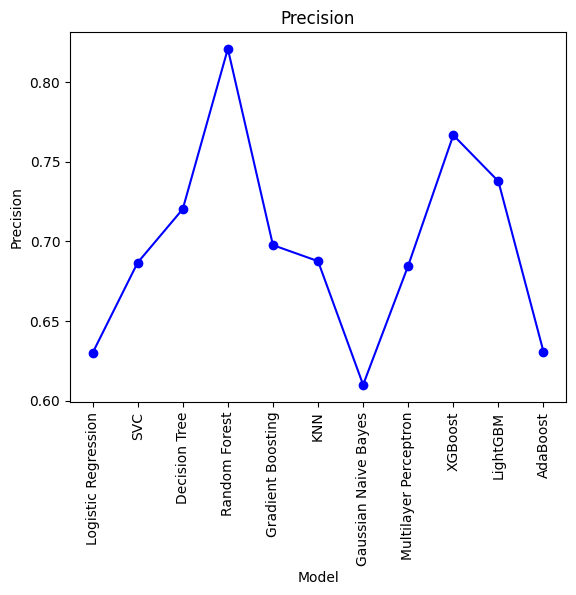

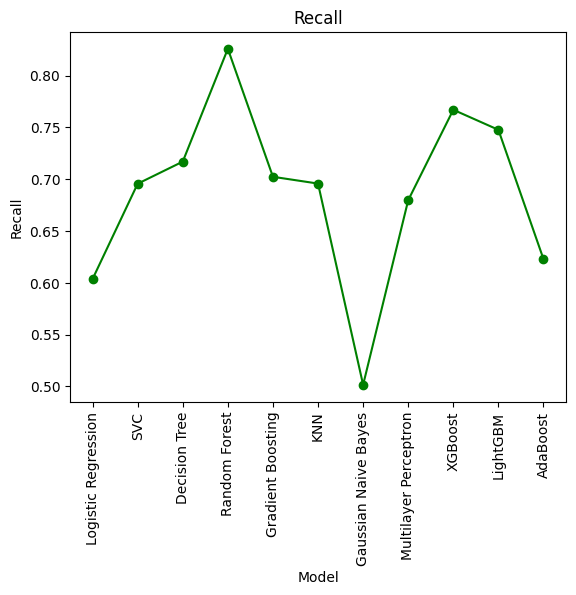

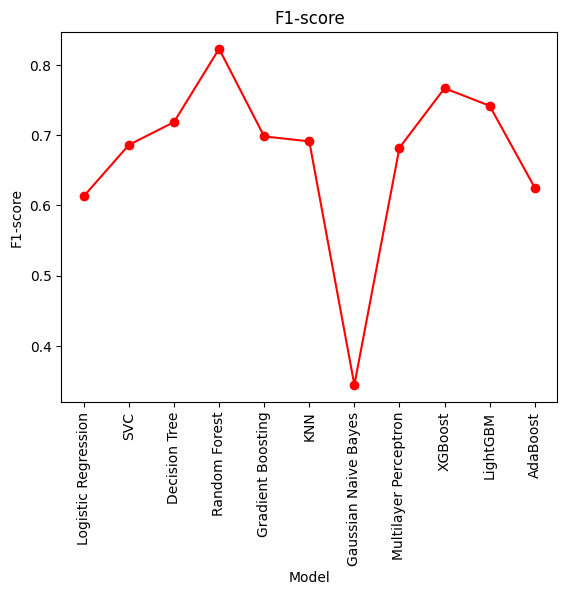

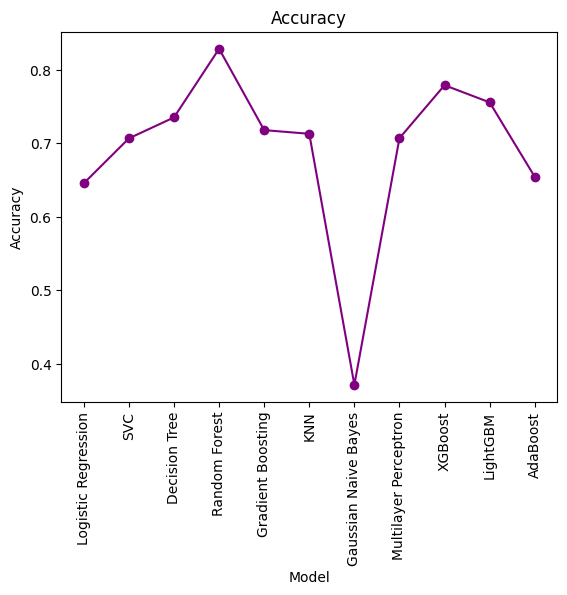

In [227]:
metrics = ['Precision', 'Recall', 'F1-score', 'Accuracy']
colors = ['blue', 'green', 'red', 'purple']

# Create separate line graphs for each metric
for metric, color in zip(metrics, colors):
    plt.figure()
    plt.title(metric)
    plt.xlabel('Model')
    plt.ylabel(metric)

    # Get the data points for the current metric
    metric_values = [evaluation_dict[model][metrics.index(metric)] for model in evaluation_dict.keys()]

    # Plot the line graph
    plt.plot(evaluation_dict.keys(), metric_values, color=color, marker='o', linestyle='-')
    plt.xticks(rotation=90)

    # Display the plot
    plt.show()

So Random forest has the highest accuracy among these models.

In [230]:
# saving random forest model.
dump(rf_model, '/content/drive/MyDrive/csi project/archive/random_forst.joblib')

['/content/drive/MyDrive/csi project/archive/random_forst.joblib']

In [28]:
ETC_Updated= ExtraTreesClassifier(n_estimators = 2000,bootstrap = True)
ETC_Updated.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=True, n_estimators=2000)

In [29]:
print(ETC_Updated.score(X_train,y_train))
ETC_Updated.score(X_test,y_test)

1.0


0.8178787878787879

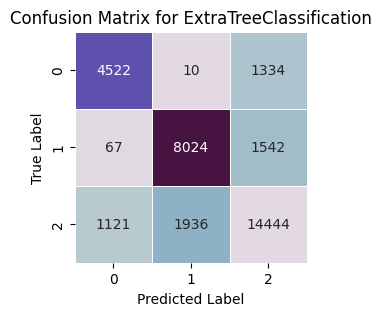

In [30]:
# Plot confusion matrix for ExtraTreeClassifier.
matrix = confusion_matrix(y_test,ETC_Updated.predict(X_test))
plt.figure(figsize=(3,3))
sns.heatmap(matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for ExtraTreeClassification');

In [31]:
print('\n clasification report:\n', classification_report(y_test,ETC_Updated.predict(X_test)))


 clasification report:
               precision    recall  f1-score   support

           0       0.79      0.77      0.78      5866
           1       0.80      0.83      0.82      9633
           2       0.83      0.83      0.83     17501

    accuracy                           0.82     33000
   macro avg       0.81      0.81      0.81     33000
weighted avg       0.82      0.82      0.82     33000



In [28]:
SMT = SMOTE()
x_SMT, y_SMT = SMT.fit_resample(X,y)
x_train_smote, x_test_smote, y_train_smote, y_test_smote = train_test_split(x_SMT, y_SMT, test_size=0.15, random_state=42)

In [29]:
print(x_train_smote.shape,x_test_smote.shape,y_train_smote.shape,y_test_smote.shape)

(135593, 29) (23929, 29) (135593,) (23929,)


In [30]:
ETC_Mod= ExtraTreesClassifier(n_estimators = 2000,bootstrap = True)
ETC_Mod.fit(x_train_smote, y_train_smote)

ExtraTreesClassifier(bootstrap=True, n_estimators=2000)

In [31]:
print(ETC_Mod.score(x_train_smote,y_train_smote))
y_pred = ETC_Mod.predict(x_test_smote)
accuracy_score(y_test_smote,y_pred)

1.0


0.8876258932675832

In [32]:
print(ETC_Mod.score(x_train_smote,y_train_smote))
y_pred = ETC_Mod.predict(x_test_smote)
accuracy_score(y_test_smote,y_pred)

1.0


0.8876258932675832

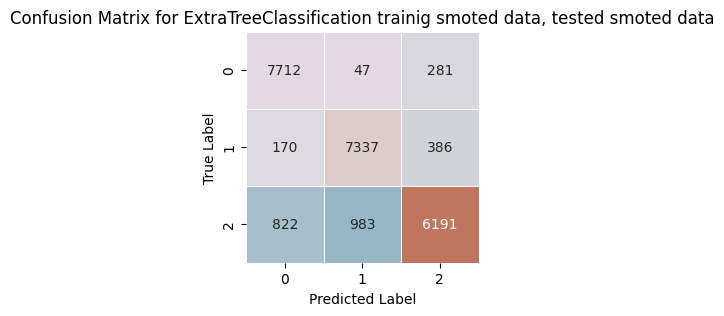

In [33]:
# Plot confusion matrix for ExtraTreeClassifier.
matrix = confusion_matrix(y_test_smote,ETC_Mod.predict(x_test_smote))
plt.figure(figsize=(3,3))
sns.heatmap(matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for ExtraTreeClassification trainig smoted data, tested smoted data');

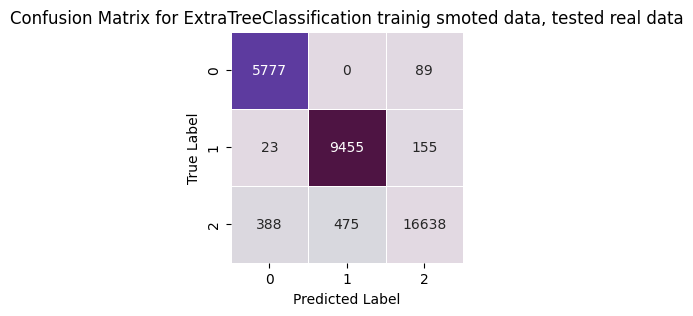

In [34]:
# Plot confusion matrix for ExtraTreeClassifier.
matrix = confusion_matrix(y_test,ETC_Mod.predict(X_test))
plt.figure(figsize=(3,3))
sns.heatmap(matrix,annot=True, cbar=False, cmap='twilight',linewidth=0.5,fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for ExtraTreeClassification trainig smoted data, tested real data');

In [35]:
print('\n clasification report:\n', classification_report(y_test_smote,ETC_Mod.predict(x_test_smote)))


 clasification report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      8040
           1       0.88      0.93      0.90      7893
           2       0.90      0.77      0.83      7996

    accuracy                           0.89     23929
   macro avg       0.89      0.89      0.89     23929
weighted avg       0.89      0.89      0.89     23929



In [36]:
print('\n clasification report:\n', classification_report(y_test,ETC_Mod.predict(X_test)))


 clasification report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      5866
           1       0.95      0.98      0.97      9633
           2       0.99      0.95      0.97     17501

    accuracy                           0.97     33000
   macro avg       0.96      0.97      0.96     33000
weighted avg       0.97      0.97      0.97     33000



Saving the models

In [89]:
from joblib import dump, load

# Assuming you have a trained model called 'model'
# Save the model code to a file
dump(ETC_Mod, '/content/drive/MyDrive/csi project/archive/ETC_Mod.joblib')

['/content/drive/MyDrive/csi project/archive/ETC_Mod.joblib']

In [ ]:
# from joblib import load

# # Load the model code from the file
# model = load('model_code.joblib')

Testing

In [232]:
df_test.head()

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Type_of_Loan_y,Monthly_Savings,Total_Accounts,Avg_Monthly_Income,Avg_Monthly_Spending,Income_to_Age_Ratio,Savings_to_Income_Ratio
80000,125634,40432,1,39.0,846314164.0,5,36115.92,2716.66,0.0,7.0,9.0,3.0,11,3.0,6.02,0.0,1,886.95,27.797266,273.0,1,78.052255,96.001442,2,357.612303,0,6014,-2.930000e+02,7.0,3.009660e+03,2.930000e+02,926.049231,-0.008113
80001,125635,40432,2,39.0,846314164.0,5,36115.92,2716.66,0.0,7.0,9.0,3.0,11,6.0,6.02,0.0,1,886.95,23.265999,274.0,1,78.052255,169.468904,4,304.144841,0,6014,-2.930000e+02,7.0,3.009660e+03,2.930000e+02,926.049231,-0.008113
80002,125636,40432,3,39.0,846314164.0,5,36115.92,2716.66,0.0,7.0,9.0,3.0,11,3.0,6.02,0.0,1,886.95,36.367486,277.5,1,78.052255,49.423717,2,394.190028,0,6014,-2.930000e+02,7.0,3.009660e+03,2.930000e+02,926.049231,-0.008113
80003,125637,40432,4,39.0,846314164.0,5,36115.92,2716.66,0.0,7.0,9.0,3.0,11,1.0,6.02,0.0,1,886.95,29.227056,277.5,1,78.052255,89.419038,1,354.194707,2,6014,-2.930000e+02,7.0,3.009660e+03,2.930000e+02,926.049231,-0.008113
80004,125638,40432,5,39.0,846314164.0,5,21710332.00,2716.66,0.0,7.0,9.0,3.0,11,4.0,3.02,0.0,1,886.95,26.446914,277.0,1,78.052255,265.420879,5,218.192866,0,6014,-1.806478e+06,7.0,1.809194e+06,1.806478e+06,556675.179487,-0.083208


Preprocssing

In [52]:
# Same preprocessing which was done on the train data

In [233]:
df_test.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Type_of_Loan_y              0
Monthly_Savings             0
Total_Accounts              0
Avg_Monthly_Income          0
Avg_Monthly_Spending        0
Income_to_Age_Ratio         0
Savings_to_Income_Ratio     0
dtype: int

Testing Unseen Data

In [ ]:
# Doing the same accuracy score type of function but with unseen test data.

In [264]:
df_test=df_test.drop(['Customer_ID','SSN','ID'] ,axis= 1)#Remove Unnesessary Columns

In [262]:
res=df_test['Credit_Score']
df_test=df_test.drop(['Credit_Score'],axis=1)

In [265]:
y_pred_unseen = rf_model.predict(df_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [266]:
print(y_pred_unseen)

[2 2 2 ... 2 2 2]


In [267]:
rf_accuracy_unseen = accuracy_score(res, y_pred_unseen)
rf_precision_unseen = precision_score(res, y_pred_unseen,average='macro')
rf_recall_unseen = recall_score(res, y_pred_unseen,average='macro')
rf_f1_score_unseen = f1_score(res, y_pred_unseen,average='macro')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [268]:
print(rf_accuracy_unseen,rf_precision_unseen,rf_recall_unseen,rf_f1_score_unseen)

0.54435 0.38240234161286796 0.35252378137502377 0.28068376412244267


Upon reviewing the sources we couldnt find anything to check upon the unseen data as no actual credit scores was given in this dataset.

Creating an Application

In [ ]:
#In progress!